#  4 Oktober 2023

In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv("nyc-rolling-sales.csv")
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# Step 2: Cek Kolom	

### 1. Hapus Kolom yang Tidak akan Digunakan

Kolom yang tidak digunakan yaitu Unnamed:0,NEIGHBORHOOD, BLOCK, TAX CLASS AT TIME OF SALE, BUILDING CLASS AT PRESENT, BUILDING CLASS AT TIME OF SALE, GROSS SQUARE FEET, dll.

In [3]:
drop_kolom= ['Unnamed: 0','NEIGHBORHOOD', 'BLOCK','TAX CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE', 
             'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'GROSS SQUARE FEET', 'ADDRESS',
            'APARTMENT NUMBER', 'ZIP CODE', 'EASE-MENT', 'LOT', 'BLOCK']

df.drop(columns=drop_kolom, inplace=True)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   BOROUGH                  84548 non-null  int64 
 1   BUILDING CLASS CATEGORY  84548 non-null  object
 2   RESIDENTIAL UNITS        84548 non-null  int64 
 3   COMMERCIAL UNITS         84548 non-null  int64 
 4   TOTAL UNITS              84548 non-null  int64 
 5   LAND SQUARE FEET         84548 non-null  object
 6   YEAR BUILT               84548 non-null  int64 
 7   SALE PRICE               84548 non-null  object
 8   SALE DATE                84548 non-null  object
dtypes: int64(5), object(4)
memory usage: 5.8+ MB
None
            BOROUGH  RESIDENTIAL UNITS  COMMERCIAL UNITS   TOTAL UNITS  \
count  84548.000000       84548.000000      84548.000000  84548.000000   
mean       2.998758           2.025264          0.193559      2.249184   
std        1.289790          16.

### 2. Cek Kesesuaian Value Kolom dengan Deskripsinya

In [4]:
df.describe()

,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,2.998758,2.025264,0.193559,2.249184,1789.322976
std,1.289790,16.721037,8.713183,18.972584,537.344993
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,1920.000000
50%,3.000000,1.000000,0.000000,1.000000,1940.000000
75%,4.000000,2.000000,0.000000,2.000000,1965.000000
max,5.000000,1844.000000,2261.000000,2261.000000,2017.000000


Pada kolom **'YEAR BUILT'** terdapat yang **bernilai nol**. Makan **perlu diperbaiki**. Selain itu hanya gunakan **data dari tahun 1900-2017**.

In [5]:
nol= df[df['YEAR BUILT']== 0]
nol.head()

,BOROUGH,BUILDING CLASS CATEGORY,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
74,1,11A CONDO-RENTALS,0,0,0,-,0,8058923,2017-08-09 00:00:00
76,1,12 CONDOS - WALKUP APARTMENTS,1,0,1,-,0,620000,2016-12-30 00:00:00
77,1,12 CONDOS - WALKUP APARTMENTS,1,0,1,-,0,-,2017-02-24 00:00:00
78,1,12 CONDOS - WALKUP APARTMENTS,1,0,1,-,0,-,2017-07-20 00:00:00
87,1,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,-,0,875000,2017-03-31 00:00:00


In [6]:
df = df.drop(df[df['YEAR BUILT'] <1900].index)
df.describe()

,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT
count,75518.000000,75518.000000,75518.000000,75518.000000,75518.000000
mean,3.043566,2.155115,0.214783,2.396051,1951.594017
std,1.290558,17.626874,9.218747,20.015367,33.315796
min,1.000000,0.000000,0.000000,0.000000,1900.000000
25%,2.000000,0.000000,0.000000,1.000000,1925.000000
50%,3.000000,1.000000,0.000000,1.000000,1949.000000
75%,4.000000,2.000000,0.000000,2.000000,1972.000000
max,5.000000,1844.000000,2261.000000,2261.000000,2017.000000


### 3. Buat Kolom Baru dengan Nama 'Year' dan 'Month'

In [7]:
# Mengonversi kolom 'tanggal' ke tipe data datetime
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

# Mengambil hanya tahun dan hanya bulan dari kolom datetime
df['Year'] = df['SALE DATE'].dt.year
df['Month'] = df['SALE DATE'].dt.month


# Merubah tipe data 'Year','Month' dan 'YEAR BUILT' menjadi string
df['Year'] = df['Year'].astype('str')
df['Month'] = df['Month'].astype('str')
df['YEAR BUILT'] = df['YEAR BUILT'].astype('str')

# Hapus kolom SALE DATE
#df.drop(columns='SALE DATE', inplace=True)


df.head()

,BOROUGH,BUILDING CLASS CATEGORY,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,Year,Month
0,1,07 RENTALS - WALKUP APARTMENTS,5,0,5,1633,1900,6625000,2017-07-19,2017,7
1,1,07 RENTALS - WALKUP APARTMENTS,28,3,31,4616,1900,-,2016-12-14,2016,12
2,1,07 RENTALS - WALKUP APARTMENTS,16,1,17,2212,1900,-,2016-12-09,2016,12
3,1,07 RENTALS - WALKUP APARTMENTS,10,0,10,2272,1913,3936272,2016-09-23,2016,9
4,1,07 RENTALS - WALKUP APARTMENTS,6,0,6,2369,1900,8000000,2016-11-17,2016,11


# Step 2: Cek Value

### Cek Missing Value

In [8]:
df.isnull().sum()

BOROUGH                    0
BUILDING CLASS CATEGORY    0
RESIDENTIAL UNITS          0
COMMERCIAL UNITS           0
TOTAL UNITS                0
LAND SQUARE FEET           0
YEAR BUILT                 0
SALE PRICE                 0
SALE DATE                  0
Year                       0
Month                      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75518 entries, 0 to 84547
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   BOROUGH                  75518 non-null  int64         
 1   BUILDING CLASS CATEGORY  75518 non-null  object        
 2   RESIDENTIAL UNITS        75518 non-null  int64         
 3   COMMERCIAL UNITS         75518 non-null  int64         
 4   TOTAL UNITS              75518 non-null  int64         
 5   LAND SQUARE FEET         75518 non-null  object        
 6   YEAR BUILT               75518 non-null  object        
 7   SALE PRICE               75518 non-null  object        
 8   SALE DATE                75518 non-null  datetime64[ns]
 9   Year                     75518 non-null  object        
 10  Month                    75518 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 6.9+ MB


Berdasarkan hasil dari **df.isnull().sum()** menunjukkan bahwa tidak ada missing value. Selain itu, hasil dari **df.info() masih** menunjukkan bahwa data tidak ada missing values. 

Ada beberapa data dengan **tipe data yang kurang sesuai** seperti **SALE PRICE** dan **LAND SQUARE FEET**.

Pada 2 kolom tersebut **terdapat missing value yang tidak terdeteksi** sehingga tipe data masih belum bisa diubah. Sehingga, perlu untuk menatasi missing value tersebut.

# Step 3: Cek Tipe Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75518 entries, 0 to 84547
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   BOROUGH                  75518 non-null  int64         
 1   BUILDING CLASS CATEGORY  75518 non-null  object        
 2   RESIDENTIAL UNITS        75518 non-null  int64         
 3   COMMERCIAL UNITS         75518 non-null  int64         
 4   TOTAL UNITS              75518 non-null  int64         
 5   LAND SQUARE FEET         75518 non-null  object        
 6   YEAR BUILT               75518 non-null  object        
 7   SALE PRICE               75518 non-null  object        
 8   SALE DATE                75518 non-null  datetime64[ns]
 9   Year                     75518 non-null  object        
 10  Month                    75518 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 6.9+ MB


### Missing Value yang tidak terdeteksi

In [11]:
mis_val= [' -  ']
print(df['SALE PRICE'].value_counts()[' -  '])
print(df['LAND SQUARE FEET'].value_counts()[' -  '])

12861
23121


Terdapat **14561** dan **26252** missing value pada kolom **SALE PRICE** dan **LAND SQUARE FEET**..

### Hapus Baris dengan Missing Value

In [12]:
# Mengganti nilai '-' dengan NaN
df['SALE PRICE'] = df['SALE PRICE'].replace(' -  ', np.nan)
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].replace(' -  ', np.nan)


# Cek kembali missing value
df.isnull().sum()

BOROUGH                        0
BUILDING CLASS CATEGORY        0
RESIDENTIAL UNITS              0
COMMERCIAL UNITS               0
TOTAL UNITS                    0
LAND SQUARE FEET           23121
YEAR BUILT                     0
SALE PRICE                 12861
SALE DATE                      0
Year                           0
Month                          0
dtype: int64

In [13]:
# Hapus semua missing value
df=df.dropna(subset=['LAND SQUARE FEET'])
df=df.dropna(subset=['SALE PRICE'])

# Cek kembali missing value
df.isnull().sum()

BOROUGH                    0
BUILDING CLASS CATEGORY    0
RESIDENTIAL UNITS          0
COMMERCIAL UNITS           0
TOTAL UNITS                0
LAND SQUARE FEET           0
YEAR BUILT                 0
SALE PRICE                 0
SALE DATE                  0
Year                       0
Month                      0
dtype: int64

Dataframe sudah **cleared dari missing value**.

### Ubah Tipe Data

In [14]:
df['SALE PRICE']= df['SALE PRICE'].astype(float)
df['LAND SQUARE FEET']= df['LAND SQUARE FEET'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43654 entries, 0 to 84547
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   BOROUGH                  43654 non-null  int64         
 1   BUILDING CLASS CATEGORY  43654 non-null  object        
 2   RESIDENTIAL UNITS        43654 non-null  int64         
 3   COMMERCIAL UNITS         43654 non-null  int64         
 4   TOTAL UNITS              43654 non-null  int64         
 5   LAND SQUARE FEET         43654 non-null  float64       
 6   YEAR BUILT               43654 non-null  object        
 7   SALE PRICE               43654 non-null  float64       
 8   SALE DATE                43654 non-null  datetime64[ns]
 9   Year                     43654 non-null  object        
 10  Month                    43654 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 4.0+ MB


### Cek kembali kesesuaian nilai dengan kolom

In [15]:
df.describe()

,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,SALE PRICE
count,43654.000000,43654.000000,43654.000000,43654.000000,4.365400e+04,4.365400e+04
mean,3.301484,2.706464,0.273698,2.996037,3.485986e+03,1.189785e+06
std,0.923594,18.272536,11.550931,21.738097,3.290177e+04,1.396728e+07
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,3.000000,1.000000,0.000000,1.000000,1.600000e+03,1.483725e+05
50%,3.000000,1.000000,0.000000,1.000000,2.258500e+03,4.900000e+05
75%,4.000000,2.000000,0.000000,2.000000,3.220000e+03,8.200000e+05
max,5.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,2.210000e+09


Pada kolom Land Square Feet, Total Units, dan Sale Price memiliki nilai **minimal adalah nol**. Maka baris tersebut bisa **dihapus** dengan anggapan bahwa transaksi properti tersebut bukan merupakan transaksi jual-beli tetapi kegiatan lainnya seperti pemindahan kepemilikan properti karena warisan, dll.

In [16]:
df = df.drop(df[df['LAND SQUARE FEET'] <=0].index)
df = df.drop(df[df['SALE PRICE'] <=0].index)
df = df.drop(df[df['TOTAL UNITS'] <=0].index)
df.describe()

,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,SALE PRICE
count,28297.000000,28297.000000,28297.000000,28297.000000,2.829700e+04,2.829700e+04
mean,3.562038,3.072446,0.340743,3.411740,4.298784e+03,1.645994e+06
std,1.019830,20.339813,14.270426,24.984274,3.615332e+04,1.730766e+07
min,1.000000,0.000000,0.000000,1.000000,2.000000e+02,1.000000e+00
25%,3.000000,1.000000,0.000000,1.000000,2.000000e+03,4.200000e+05
50%,4.000000,2.000000,0.000000,2.000000,2.500000e+03,6.100000e+05
75%,4.000000,2.000000,0.000000,2.000000,4.000000e+03,9.310000e+05
max,5.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,2.210000e+09


  #   --------------------------------- Penjelasan Setiap Kolom ------------------------------------
  
  
  - Borough = Lokasi properti
  - Building Class Category = kategori kelas properti
  - Residental Units =  jumlah unit hunian yang digunakan untuk tujuan tempat tinggal dalam sebuah bangunan atau properti
  - Commercial Units = jumlah unit yang digunakan untuk tujuan bisnis atau komersial dalam sebuah bangunan atau properti.
  - Total unit = total residental unit dan commercial units dalam sebuah properti
  - Land square feet = luas properti
  - Year built = tahun properti dibangun
  - Sale price = harga jual properti
  - Year = Tahun dijual
  

  #   ------------------------------- Measure of Central Tendency --------------------------------

## 1. Mean

In [17]:
df_mean= df.groupby('Year').sum()
df_mean=df_mean[['TOTAL UNITS', 'LAND SQUARE FEET', 'SALE PRICE']]
mean_values= df_mean.mean()
print(mean_values)

TOTAL UNITS         4.827100e+04
LAND SQUARE FEET    6.082135e+07
SALE PRICE          2.328835e+10
dtype: float64


C:\Users\novir\AppData\Local\Temp\ipykernel_13332\1456983634.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean= df.groupby('Year').sum()


Kesimpulan dari data penjualan properti NYC tahun 2016-2017 :
- **Rata-rata properti** yang terjual sejumlah **48.271 unit setiap tahunnya**.
- **Rata-rata luas properti** yang terjual memiliki luas **60.821.350 square feet**.
- **Rata-rata harga jual properti** terjual **23.2 miliar USD**.

## 2. Median

In [18]:
df_med= df.groupby('YEAR BUILT').sum()
df_med= df_med[['TOTAL UNITS', 'LAND SQUARE FEET', 'SALE PRICE']]
med_values= df_med.median()
med_values

C:\Users\novir\AppData\Local\Temp\ipykernel_13332\2398299001.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_med= df.groupby('YEAR BUILT').sum()


TOTAL UNITS               267.0
LAND SQUARE FEET       337359.5
SALE PRICE          125553998.5
dtype: float64

Kesimpulan dari data penjualan properti NYC tahun 2016-2017 :
- **Nilai median dari total properti** yang terjual yaitu  **267 unit setiap tahunnya**.
- **Nilai median dari luas properti** yang terjual yaitu **337.359 square feet**.
- **Nilai median dari harga jual properti** terjual **125.553.998 USD atau 125 juta USD**.

## 3. Modus

In [19]:
# Tambah kolom baru 'Type'

def type(row):
    if row['RESIDENTIAL UNITS'] == 0:
        return 'C'
    elif row['COMMERCIAL UNITS'] == 0 :
        return 'R'
    else:
        return 'M'
df['Type']=df.apply(type, axis=1)
df.head(2)

,BOROUGH,BUILDING CLASS CATEGORY,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,Year,Month,Type
0,1,07 RENTALS - WALKUP APARTMENTS,5,0,5,1633.0,1900,6625000.0,2017-07-19,2017,7,R
3,1,07 RENTALS - WALKUP APARTMENTS,10,0,10,2272.0,1913,3936272.0,2016-09-23,2016,9,R


Membuat kolom baru yaitu kolom 'Type' yang menunjukkan tipe dari properti. Berikut tipenya:
- **'R'** menunjukkan bahwa penjualan properti tersebut hanya terdiri dari residental unit saja.
- **'C'** menunjukkan bahwa penjualan properti tersebut hanya terdiri dari commercial unit saja.
- **'M'** menunjukkan bahwa penjualan properti tersebut gabungan dari residental dan commercial unit.

In [20]:
import statistics as ss

#df_mod= df[['BOROUGH', 'BUILDING CLASS CATEGORY', 'Type']]

mod1= ss.mode(df['BUILDING CLASS CATEGORY'])
print(mod1)

mod2= ss.mode(df['Type'])
print(mod2)

mod3= ss.mode(df['BOROUGH'])
print(mod3)

01 ONE FAMILY DWELLINGS                    
R
4


Dalam dataframe tersebut modus yang didapatkan yaitu :
- Kategori kelas properti yang **paling laris** yaitu kategori **01 ONE FAMILY DWELLINGS**. 
- Transaksi properti yang **paling sering dilakukan** yaitu kategori **Resident** atau jenis unit hunian.
- Properti yang paling laris terjual di tahun 2016-2017 yaitu properti yang terletak di **Queens**.

#   -------------------------------------- Measure of Spread -------------------------------------------

## 1. Range/Jangkauan

In [21]:
df_range=df[['TOTAL UNITS','LAND SQUARE FEET','SALE PRICE']]
range= df_range.agg(["min","max"])
range

,TOTAL UNITS,LAND SQUARE FEET,SALE PRICE
min,1,200.0,1.000000e+00
max,2261,4228300.0,2.210000e+09


In [22]:
range1= df_range['TOTAL UNITS'].max()-df_range['TOTAL UNITS'].min()
range2= df_range['LAND SQUARE FEET'].max()-df_range['LAND SQUARE FEET'].min()
range3= df_range['SALE PRICE'].max()-df_range['SALE PRICE'].min()

print(range1, range2, range3)

2260 4228100.0 2209999999.0


Kesimpulan hasil di atas berdasarkan data penjualan properti 2016-2017:
- Properti yang terjual memiliki total unit paling sedikit 1 dan paling banyak 2261. Sehingga, jangkauan atau selisih properti dengan unit paling banyak dan paling sedikit yaitu **2260.** Hal tersebut menggambarkan bahwa penjualan properti yang dilakukan mulai dari penjualan 1 unit apartemen hingga beberapa 2260 unit properti dimana bisa saja 2260 unit tersebut merupakan 1 kesatuan bangunan. 
- Properti yang terjual memiliki luas paling sedikit 4.228.300 square feet dan paling sedikit 200  square feet. Sehingga, jangkauan atau selisih properti dengan luas paling banyak dan paling sedikit yaitu **4.228.100.**
- Properti yang terjual dibeli dengan harga paling rendah 1 USD dan paling mahal 2.210.000.000 USD. Sehingga, jangkauan atau selisih properti dengan harga paling mahal dan paling murah yaitu **2.209.999.999.** Nilai ini tidak masuk akal karena terdapat harga jual bernilai mendekati nol atau sama dengan nol sebab properti tersebut berpindah kepemilikan tanpa adanya harga jual seperti pemberian warisan, dll.

## 2. Variance/Variasi

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28297 entries, 0 to 84547
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   BOROUGH                  28297 non-null  int64         
 1   BUILDING CLASS CATEGORY  28297 non-null  object        
 2   RESIDENTIAL UNITS        28297 non-null  int64         
 3   COMMERCIAL UNITS         28297 non-null  int64         
 4   TOTAL UNITS              28297 non-null  int64         
 5   LAND SQUARE FEET         28297 non-null  float64       
 6   YEAR BUILT               28297 non-null  object        
 7   SALE PRICE               28297 non-null  float64       
 8   SALE DATE                28297 non-null  datetime64[ns]
 9   Year                     28297 non-null  object        
 10  Month                    28297 non-null  object        
 11  Type                     28297 non-null  object        
dtypes: datetime64[ns](1), float64(2)

In [24]:
var= df[['TOTAL UNITS','LAND SQUARE FEET','SALE PRICE']].agg('var')
var

TOTAL UNITS         6.242139e+02
LAND SQUARE FEET    1.307063e+09
SALE PRICE          2.995550e+14
dtype: float64

Kesimpulan hasil di atas berdasarkan data penjualan properti 2016-2017:
- Nilai variance dari data total unit yaitu **6.24.**
- Nilai variance dari data land square feet yaitu **1307063000.**
- Nilai variance dari data sale price yaitu **299.555.000.000.000.** Nilai ini tidak masuk akal karena terdapat harga jual bernilai mendekati nol atau sama dengan nol sebab properti tersebut berpindah kepemilikan tanpa adanya harga jual seperti pemberian warisan, dll.

## 3. Standart Deviation

In [25]:
std= df[['TOTAL UNITS','LAND SQUARE FEET','SALE PRICE']].agg('std')
std

TOTAL UNITS         2.498427e+01
LAND SQUARE FEET    3.615332e+04
SALE PRICE          1.730766e+07
dtype: float64

Kesimpulan hasil di atas berdasarkan data penjualan properti 2016-2017:
- Nilai standar deviasi dari data total unit yaitu **24.**
- Nilai standar deviasi dari data land square feet yaitu **36.153.**
- Nilai standar deviasi dari data sale price yaitu **17.307.660.**

#   -------------------------------------------- Pertanyaan -----------------------------------------------

## 1. Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?

## --------------------------------------------------- Uji Hipotesis -----------------------------------------------------------

Berdasarkan pertanyaan tersebut dapat dibuat sebuah hipotesis sebagai berikut:
- Apakah rata-rata penjualan properti tua sama dengan properti baru ( Hipotesis nol)
- Apakah rata-rata penjualan properti tua tidak sama dengan properti baru ( Hipotesis alternatif)
    
    **Ho adalah μ old = μ current**
    
    **Ha adalah μ old ≠ μ current**

Catatan :
  - Properti tua (old) = properti yang dibangun tahun 1900-2000.
  - Properti baru (current) = properti yang dibangung tahun 2001 dan seterusnya

In [26]:
# Siapkan data properti tua dan properti baru

grup=df.groupby('YEAR BUILT').sum()
grup.reset_index(inplace=True)

old =grup[grup["YEAR BUILT"]<= '2000']
current =grup[grup["YEAR BUILT"]>='2001']

C:\Users\novir\AppData\Local\Temp\ipykernel_13332\1529268391.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grup=df.groupby('YEAR BUILT').sum()


In [27]:
import pandas as pd
from scipy import stats


# Melakukan uji t independent (two-sample t-test)
t_stat, p_value = stats.ttest_ind(old['TOTAL UNITS'], current['TOTAL UNITS'])

# Menampilkan hasil uji t
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Ambang signifikansi (alpha)
alpha = 0.05

# Menguji hipotesis dengan ambang signifikansi 0.05
if p_value < alpha:
    print("Hipotesis Nol ditolak: Rata-rata usia populasi A tidak sama dengan rata-rata usia populasi B")
else:
    print("Tidak cukup bukti untuk menolak Hipotesis Nol: Rata-rata penjualan properti  sama dengan rata-rata usia populasi B")

T-Statistic: 1.3205706306264262
P-Value: 0.18924409473918014
Tidak cukup bukti untuk menolak Hipotesis Nol: Rata-rata penjualan properti  sama dengan rata-rata usia populasi B


Note : Pengujian hipotesis ini merupakan pengujian hipotesis two-side dengan significant level 0,05.

Diperoleh :
    **Tidak terdapat perbedaan yang signifikan antara dua populasi.**
    
- Sehingga, rata-rata penjualan properti tua sama dengan properti baru
- Hasil kurang dari 0,05 atau gagal menolak hipotesis nol.

## -------------------------------------------------- Cek Distribusi Data ---------------------------------------------------

In [61]:
# Melakukan operasi logaritma pada kolom DataFrame menggunakan NumPy
old['TOTAL UNITS'] = np.log(old['TOTAL UNITS'])
current['TOTAL UNITS'] = np.log(current['TOTAL UNITS'])

C:\Users\novir\AppData\Local\Temp\ipykernel_13332\1121453042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old['TOTAL UNITS'] = np.log(old['TOTAL UNITS'])
C:\Users\novir\AppData\Local\Temp\ipykernel_13332\1121453042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current['TOTAL UNITS'] = np.log(current['TOTAL UNITS'])


C:\Users\novir\AppData\Local\Temp\ipykernel_13332\3657613099.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(old['TOTAL UNITS'], label='Rata-Rata Penjualan Bangunan 1900-2000', shade=True)
C:\Users\novir\AppData\Local\Temp\ipykernel_13332\3657613099.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(current['TOTAL UNITS'], label='Rata-Rata Penjualan Bangunan 2001 so on', shade=True)


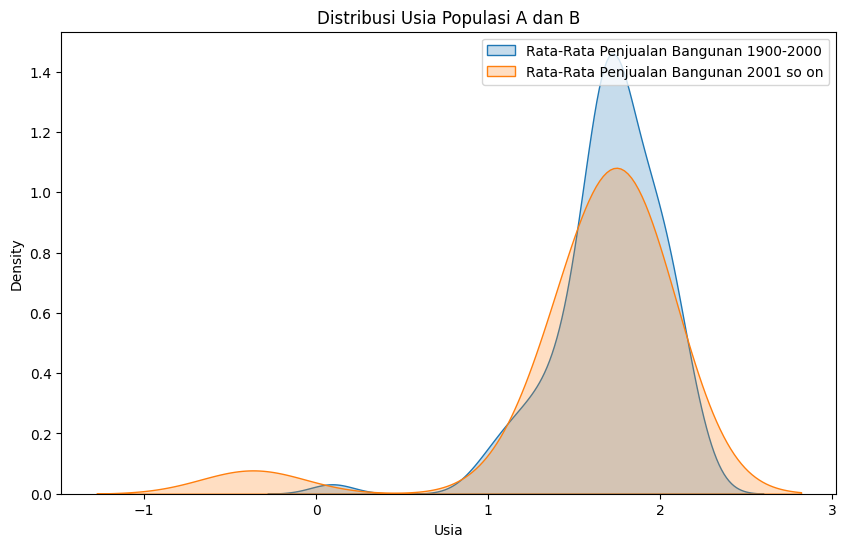

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menggunakan KDE plot untuk memplot distribusi data
plt.figure(figsize=(10, 6))
sns.kdeplot(old['TOTAL UNITS'], label='Rata-Rata Penjualan Bangunan 1900-2000', shade=True)
sns.kdeplot(current['TOTAL UNITS'], label='Rata-Rata Penjualan Bangunan 2001 so on', shade=True)

# Menambahkan label, judul, dan legenda
plt.xlabel('Usia')
plt.ylabel('Density')
plt.title('Distribusi Usia Populasi A dan B')
plt.legend()

# Menampilkan plot
plt.show()

Berdasarkan grafik di atas menunjukkan bahwa kedua data dari populasi tidak terdistribusi normal. Untuk memastikan hal tersebut, coba cek distribusi data menggunakan **Shapiro Wilk Test**.

In [63]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(old['TOTAL UNITS'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.899, p=0.000
Probably not Gaussian


**Kesimpulannya :** 
- Grafik menunjukkan bahwa data tidak terdistribusi normal
- Uji Shapiro juga menunjukkan bahwa data tidak terdistribusi normal

## ------------------------------------------------ Confidence Interval (CI) -----------------------------------------------

In [43]:
import statsmodels.api as sm

# Confidence interval untuk perbedaan rata-rata dua populasi
confidence_level = 0.95
ci_low, ci_high = sm.stats.ttest_ind(old['TOTAL UNITS'], current['TOTAL UNITS'])[1], sm.stats.ttest_ind(old['TOTAL UNITS'], current['TOTAL UNITS'])[1]

print("Confidence interval untuk perbedaan rata-rata dua populasi: ({}, {})".format(ci_low, ci_high))

Confidence interval untuk perbedaan rata-rata dua populasi: (0.18924409473918014, 0.18924409473918014)


**Kesimpulan**:

Perbedaan rata-rata antara dua populasi diperkirakan berada di sekitar 0.18924409473918014. Dengan kata lain, ada keyakinan sebesar 95% bahwa perbedaan rata-rata antara dua populasi berada di antara nilai tersebut.

## 2. Is there a difference in unit sold based on building category?

Berdasarkan hasil modus menunjukkan bahwa kategori kelas bangunan dengan jumlah transaksi paling banyak yaitu kategori **01 ONE FAMILY DWELLINGS.**

## -------------------------------------------------- Uji Hipotesis ----------------------------------------------------------

**Ho adalah p >= 0.5**

**Ha adalah p < 0.5**


Jenis pengujiannya yaitu left one-tailed test

In [32]:
grup2= df.groupby('BUILDING CLASS CATEGORY').size()   # Untuk memperoleh jumlah transaksi penjualan berdasarkan kategorinya
grup2.head()

BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS                        12751
02 TWO FAMILY DWELLINGS                         9538
03 THREE FAMILY DWELLINGS                       2150
05 TAX CLASS 1 VACANT LAND                        38
06 TAX CLASS 1 - OTHER                            13
dtype: int64

In [33]:
# Menghitung proporsi 01 ONE FAMILY DWELLINGS pada 'BUILDING CLASS CATEGORY

pop_01 = 12751/grup2.sum()
print(f"Proposi transaksi penjualan 01 ONE FAMILY DWELLINGS adalah {pop_01} dari total penjualan")

Proposi transaksi penjualan 01 ONE FAMILY DWELLINGS adalah 0.45061313920203555 dari total penjualan


In [34]:
# Menghitung standar deviasi populasi untuk proporsi
std_dev = (( 0.5 * (1 - 0.5)) / grup2.sum()) ** 0.5
# Menghitung nilai z-score
z_score = (0.45 - 0.5) / std_dev

# Menghitung nilai p menggunakan uji z
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Menampilkan hasil uji hipotesis
print("Nilai Z-Score:", z_score)
print("P-Value:", p_value)

# Ambang signifikansi (alpha)
alpha = 0.05

# Menguji hipotesis dengan ambang signifikansi 0.05
if p_value < alpha:
    print("Hipotesis Nol ditolak: Proporsi kategori 01 tidak >= 0.05")
else:
    print("Tidak cukup bukti untuk menolak Hipotesis Nol: Proporsi kategori 01 <= 0.05")

Nilai Z-Score: -16.82171216018155
P-Value: 0.0
Hipotesis Nol ditolak: Proporsi kategori 01 tidak >= 0.05


**Kesimpulan hipotesis:**
- Hipotesis nol ditolak dan hipotesis alternatif diterima. Sehingga, proporsi kategori 01 <= 0.05
- Pengujian tersebut menjelaskan bahwa proporsi transaksi penjualan 

## ----------------------------------------------------- Cek Distribusi Data -----------------------------------------------

In [49]:
# Melakukan operasi logaritma pada kolom DataFrame menggunakan NumPy
grup2 = np.log(grup2)

C:\Users\novir\AppData\Local\Temp\ipykernel_13332\277181330.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(grup2, label=' Penjualan Properti Berdasarkan Kategori Kelas', shade=True)


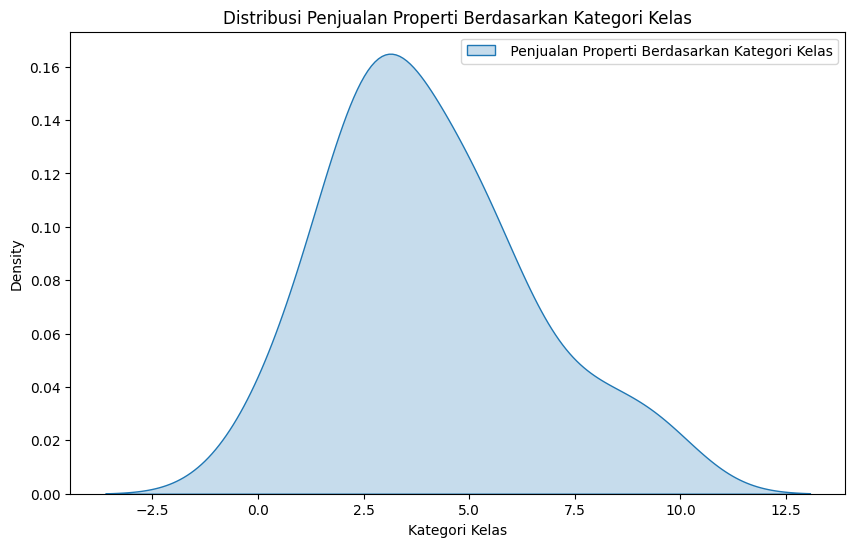

In [58]:
# Menggunakan KDE plot untuk memplot distribusi data
plt.figure(figsize=(10, 6))
sns.kdeplot(grup2, label=' Penjualan Properti Berdasarkan Kategori Kelas', shade=True)

# Menambahkan label, judul, dan legenda
plt.xlabel('Kategori Kelas')
plt.ylabel('Density')
plt.title('Distribusi Penjualan Properti Berdasarkan Kategori Kelas')
plt.legend()

# Menampilkan plot
plt.show()

Berdasarkan grafik di atas menunjukkan bahwa kedua data dari populasi tidak terdistribusi normal. Untuk memastikan hal tersebut, coba cek distribusi data menggunakan **Shapiro Wilk Test**.

In [51]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(grup2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.957, p=0.271
Probably Gaussian


**Kesimpulannya :** 
- Grafik menunjukkan bahwa data terdistribusi normal
- Uji Shapiro juga menunjukkan bahwa data terdistribusi normal

## ------------------------------------------------- Confidence Interval (CI) -------------------------------------------------

In [59]:
# Data contoh (gantilah dengan data sebenarnya)
successes = 0.5*grup2.sum()
total = grup2.sum()

# Confidence interval untuk proporsi
ci_low, ci_high = sm.stats.proportion_confint(successes, total, alpha=1-0.05)

print("Confidence interval untuk proporsi: ({}, {})".format(ci_low, ci_high))


Confidence interval untuk proporsi: (0.4971102018840476, 0.5028897981159524)


**Kesimpulan**:
- Dengan tingkat kepercayaan 95%, proporsi penjualan properti dengan kelas 01 diperkirakan berada di antara 0.4998136135687435 dan 0.5001863864312566. 
- Dengan kata lain, prediksi proporsi penjualan properti dengan kelas 01 terhadap populasi berada direntang 0.4998136135687435 dan 0.5001863864312566.

## 3. What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

In [37]:
df.head()

,BOROUGH,BUILDING CLASS CATEGORY,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,Year,Month,Type
0,1,07 RENTALS - WALKUP APARTMENTS,5,0,5,1633.0,1900,6625000.0,2017-07-19,2017,7,R
3,1,07 RENTALS - WALKUP APARTMENTS,10,0,10,2272.0,1913,3936272.0,2016-09-23,2016,9,R
4,1,07 RENTALS - WALKUP APARTMENTS,6,0,6,2369.0,1900,8000000.0,2016-11-17,2016,11,R
6,1,07 RENTALS - WALKUP APARTMENTS,8,0,8,1750.0,1920,3192840.0,2016-09-23,2016,9,R
9,1,08 RENTALS - ELEVATOR APARTMENTS,24,0,24,4489.0,1920,16232000.0,2016-11-07,2016,11,R


In [44]:
df.groupby('Year').sum()

C:\Users\novir\AppData\Local\Temp\ipykernel_13332\751244658.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Year').sum()


,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,SALE PRICE
Year,,,,,,
2016,35838,34921,5173,40078,44804449.0,1.757540e+10
2017,64957,52020,4469,56464,76838248.0,2.900129e+10


**Berdasarkan hasil di atas dapat disimpulkan bahwa :**
Penjualan properti mengalami kenaikkan baik dari segi total unit dan jumlah total penjualan. Namun, pada tahun 2017, unit commercial mengalami penurunan sekitar 13% penjualan sedangkan penjualan unit resident (unit hunian) mengalami kenaikkan hingga 48.9%.

In [48]:
y= (5173- 4469)/5173
x= (52020-34921)/34921

print(y, x)

0.13609124299246086 0.48964806277025286
